# Trading Project

- Using yahoo api to get the price from different companies

In [45]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
apple = tickerData.history(period='1d', start='2010-1-1', end="2020-9-6")
tickerData.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2020-08-31 12:07:36,Wedbush,Outperform,,main
2020-08-31 16:24:32,Argus Research,Buy,,main
2020-09-01 12:50:49,Bank of America,Neutral,,reit


In [3]:
import datetime

start_sp = datetime.datetime(2010, 1, 1)
end_sp = datetime.datetime(2020, 9, 7)

In [4]:
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)
SP500 = pdr.get_data_yahoo('SPY', start_sp, end_sp)
    
SP500.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,112.769997,112.800003,111.389999,111.440002,90.310234,90637900
2010-01-04,112.370003,113.389999,111.510002,113.330002,91.841896,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.084984,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.149803,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.538841,131091100


In [5]:
len(SP500)#2689

2689

### Using Mongodb

In [7]:
import pymongo
from pymongo import MongoClient

In [9]:
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["Stocks"]
mycol = mydb["Tickers"]

In [90]:
# Step 2: Insert Data into DB
SP500.reset_index(inplace=True) # Reset Index
data_dict = SP500.to_dict("records") # Convert to dictionary
mycol.insert_one({"Index":"SPY","data":data_dict}) # inesrt into DB

### Get data from DB

In [23]:
# Step 3: Get data from DB
data_from_db = mycol.find_one({"symbol":"FB"})
FB = pd.DataFrame(data_from_db["data"])
FB.set_index("Date",inplace=True)

In [24]:
AMZN.to_csv('AMZN.csv')
AAPL.to_csv('AAPL.csv')
GOOG.to_csv('GOOG.csv')
TSLA.to_csv('TSLA.csv')
MSFT.to_csv('MSFT.csv')
SPY.to_csv('SPY.csv')
FB.to_csv('FB.csv')

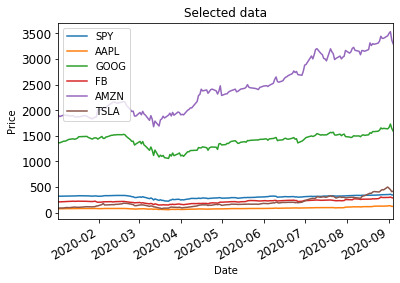

SPY      54.403965
GOOG    315.596611
TSLA     53.110601
MSFT     47.614139
FB       59.147332
AMZN    724.673347
AAPL     20.206789
dtype: float64


In [80]:
def plot_selected(df1, columns, start_index, end_index):
    plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def normalize_data(df1):
    return df1 / df1.loc[0,:]

def plot_data(df1, title = "Stock prices"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        plt.show()
        
def test_run():
    dates = pd.date_range('2013-01-01', '2020-09-07')
    symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', "AAPL"]
    #Get stock data
    df1 = get_data(symbols, dates)
    
    plot_selected(df1, ["SPY", "AAPL", "GOOG", "FB", "AMZN", "TSLA"], "2020-01-02", "2020-09-04")
    
    print(df1.std())
    
   
    
if __name__ == "__main__":
    test_run()

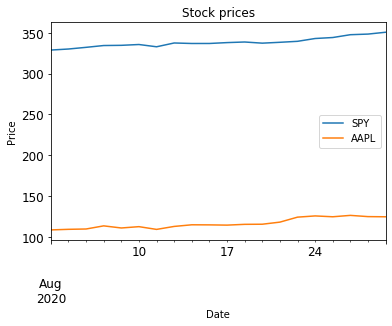

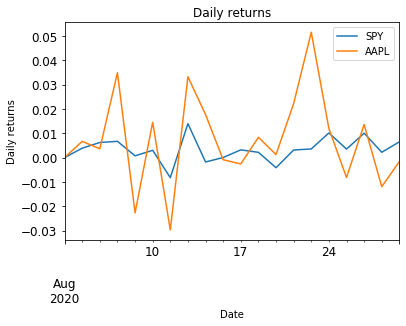

In [78]:
#def plot_selected(df1, columns, start_index, end_index):
  #  plot_data(df1.loc[start_index:end_index, columns], title="Selected data")
    

def symbol_to_path(symbol, base_dir='data'):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    
    df1 = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date', 'Adj Close'], na_values=['nan'])
        
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
        if symbol == 'SPY':
            df1 = df1.dropna(subset=['SPY'])
    return df1

def plot_data(df1, title = "Stock prices", xlabel="Date", ylabel="Price"):
        ax = df1.plot(title=title, fontsize=12)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        plt.show()
        
def compute_daily_returns(df1):
    daily_returns = df1.copy()
    
    daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns
        
def test_run():
    dates = pd.date_range('2020-08-01', '2020-08-30')
    symbols = ['SPY', 'AAPL']
    #Get stock data
    df1 = get_data(symbols, dates)
    plot_data(df1)
    
    daily_returns = compute_daily_returns(df1)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
   
    
if __name__ == "__main__":
    test_run()

In [133]:
start_date = '2012-06-01' #2010, 1, 1
end_date = '2020-09-07'
dates = pd.date_range(start_date, end_date)
    #print(dates[0])
df1 = pd.DataFrame(index=dates)#empy dataframe
    #print(df1)
dfSPY = pd.read_csv('data/SPY.csv', index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'],
                    na_values=['nan'])
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    #print(dfSPY)
df1 = df1.join(dfSPY, how = 'inner')
df1 = df1.dropna()
    #print(df1)
    
symbols = ['GOOG', 'TSLA', 'MSFT', 'FB', 'AMZN', 'AAPL']
for symbol in symbols:
    df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col='Date', parse_dates=True,
                          usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
    

In [134]:
df1

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL
2012-06-01,108.594398,284.423920,5.630000,23.588511,27.719999,208.220001,17.313335
2012-06-04,108.543587,288.214691,5.576000,23.671429,26.900000,214.570007,17.415182
2012-06-05,109.365501,284.139984,5.582000,23.638258,25.870001,213.210007,17.370125
2012-06-06,111.822762,289.200989,5.844000,24.334715,26.809999,217.639999,17.636463
2012-06-07,111.890556,288.035370,5.786000,24.235220,26.309999,218.800003,17.644480
...,...,...,...,...,...,...,...
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997


In [135]:
df = df1.copy()

### Model

In [136]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [138]:
df.shape

(2080, 7)

In [151]:
data = df.filter(['GOOG'])
dataset = data.values #convert to nparray
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1664

In [152]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data
#training dataset
train_data = scaled_data[0: training_data_len, :]
#split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00409902, 0.0067137 , 0.00390317, 0.007394  , 0.00659002,
       0.00735279, 0.00324691, 0.0020787 , 0.00070093, 0.        ,
       0.001876  , 0.00405435, 0.00772385, 0.00634264, 0.00211651,
       0.0042708 , 0.00056693, 0.00193441, 0.00352178, 0.00180727,
       0.00722222, 0.00735965, 0.00988846, 0.01266809, 0.00925282,
       0.00926314, 0.00778226, 0.00417115, 0.00392721, 0.00600248,
       0.00545275, 0.00607464, 0.0074593 , 0.01168541, 0.01778754,
       0.01939897, 0.01667089, 0.01681518, 0.01866026, 0.02608175,
       0.0251678 , 0.025398  , 0.02529837, 0.02394807, 0.0282704 ,
       0.02878234, 0.02799896, 0.02857961, 0.02862085, 0.02850059,
       0.03468861, 0.03766065, 0.03727583, 0.03910716, 0.04057427,
       0.04002454, 0.03795269, 0.04058801, 0.04045744, 0.04108621])]
[0.03785304606316087]



In [153]:
#conver x_train and y_train to nparray
x_train, y_train = np.array(x_train), np.array(y_train)

In [154]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1604, 60, 1)

In [155]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [156]:
#compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [157]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Train on 1604 samples
1604/1604 [==============================] - 82s 51ms/sample - loss: 7.3134e-04


In [158]:
#creat testing data set
test_data = scaled_data[training_data_len - 60:, :]
#create x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])


In [159]:
#convert data to nparray
x_test = np.array(x_test)
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(416, 60, 1)

In [160]:
#models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [161]:
# get the RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

20.71640836275541

C:\Users\utilisateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


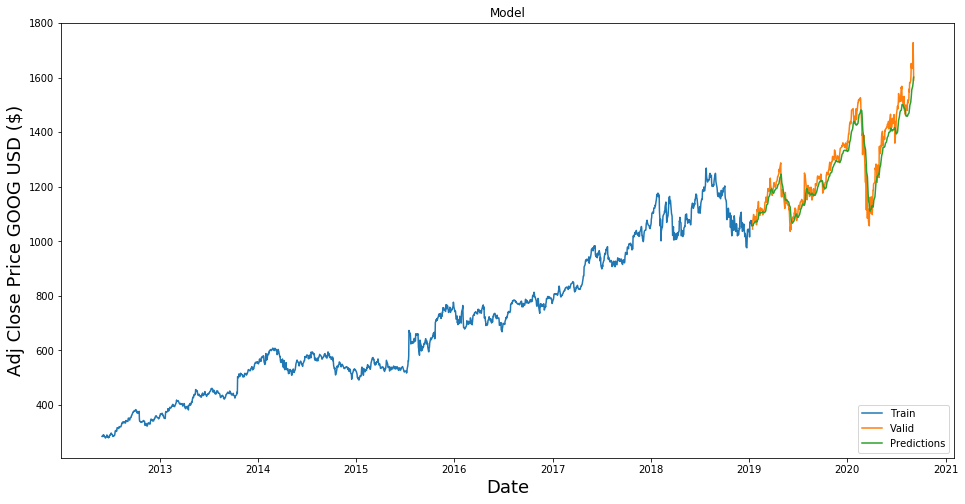

In [164]:
#plot
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price GOOG USD ($)', fontsize=18)
plt.plot(train['GOOG'])
plt.plot(valid[['GOOG', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [163]:
#show valid and predicted prices
valid

,SPY,GOOG,TSLA,MSFT,FB,AMZN,AAPL,Predictions
2019-01-14,250.039413,1044.689941,66.879997,99.769432,145.389999,1617.209961,36.691772,1057.899048
2019-01-15,252.905075,1077.150024,68.886002,102.663292,148.949997,1674.560059,37.442734,1056.628052
2019-01-16,253.517014,1080.969971,69.209999,103.025009,147.539993,1683.780029,37.900158,1057.922363
2019-01-17,255.440445,1089.900024,69.461998,103.748474,148.300003,1693.219971,38.125195,1060.539307
2019-01-18,258.840332,1098.260010,60.452000,105.302940,150.039993,1696.199951,38.360023,1064.536865
...,...,...,...,...,...,...,...,...
2020-08-31,349.309998,1634.180054,498.320007,225.529999,293.200012,3450.959961,129.039993,1566.539307
2020-09-01,352.600006,1660.709961,475.049988,227.270004,295.440002,3499.120117,134.179993,1573.587524
2020-09-02,357.700012,1728.280029,447.369995,231.649994,302.500000,3531.449951,131.399994,1581.475708
2020-09-03,345.390015,1641.839966,407.000000,217.300003,291.119995,3368.000000,120.879997,1596.732788


### Scraping News for Sentiment Analysis

In [170]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [166]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG', 'AAPL', 'MSFT']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [167]:
# Read one single day of headlines for 'AMZN' 
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

Ambanis Reliance to Offer $20 Billion Stake in Retail Arm to Amazon
Sep-10-20 02:41AM  
We're Back! S&P 500 Up Big as Tech Stock Gains Outpace Airline, Cruise Stocks Selloff
Sep-09-20 06:47PM  
Stock market news live updates: Stock futures hug the flat line, steadying after rebound rally
06:23PM  
What to Know About Grail, the Cancer-Test Company That Filed to Go Public
05:44PM  


In [168]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Sep-10-20',
  '02:41AM',
  'Ambanis Reliance to Offer $20 Billion Stake in Retail Arm to Amazon'],
 ['AMZN',
  'Sep-09-20',
  '06:47PM',
  "We're Back! S&P 500 Up Big as Tech Stock Gains Outpace Airline, Cruise Stocks Selloff"],
 ['AMZN',
  'Sep-09-20',
  '06:23PM',
  'Stock market news live updates: Stock futures hug the flat line, steadying after rebound rally'],
 ['AMZN',
  'Sep-09-20',
  '05:44PM',
  'What to Know About Grail, the Cancer-Test Company That Filed to Go Public'],
 ['AMZN',
  'Sep-09-20',
  '05:08PM',
  'Dow Jones Futures: Stock Market Rally Rebounds On Tesla, Apple, Zoom Video, Microsoft, But Remain Cautious; RH Skyrockets On Earnings'],
 ['AMZN',
  'Sep-09-20',
  '05:08PM',
  'Amazon pays £290m in UK tax as sales surge to £14bn'],
 ['AMZN',
  'Sep-09-20',
  '04:42PM',
  'Amazon names former commander of U.S. Cyber Command to board of directors'],
 ['AMZN',
  'Sep-09-20',
  '04:40PM',
  'Theres good value to be had: CFRA on tech ETFs'],
 ['AMZN',
  'Sep-0

In [ ]:
mycol.insert_one({"name":"News","data":parsed_news}) # inesrt into DB

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\utilisateur/nltk_data'
    - 'C:\\Users\\utilisateur\\Anaconda3\\nltk_data'
    - 'C:\\Users\\utilisateur\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\utilisateur\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\utilisateur\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
